# パターン認識論レポート課題２    B4TB2047 小倉 康睦

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
from itertools import product
from matplotlib import pyplot as plt

# 1. 判別評価基準 (ユークリッド・類似度・重みつきユークリッド距離)

## ユークリッド距離

In [2]:
def euclid(class1, class2, class3, class4, test):
    met = np.zeros((test.shape[0], 4))
    result = np.zeros(test.shape[0], dtype='int')

    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)
    mean3 = np.mean(class3, axis=0)
    mean4 = np.mean(class4, axis=0)
    for k, p_t in enumerate(test):
        min_dist1 = np.linalg.norm(mean1 - p_t)
        min_dist2 = np.linalg.norm(mean2 - p_t)
        min_dist3 = np.linalg.norm(mean3 - p_t)
        min_dist4 = np.linalg.norm(mean4 - p_t)
        met[k][0] = min_dist1
        met[k][1] = min_dist2
        met[k][2] = min_dist3
        met[k][3] = min_dist4
        result[k] = np.argmin(met[k]) + 1
    return met, result

## 類似度（コサイン類似度）

In [3]:
def similarity(class1, class2, class3, class4, test):
    met = np.zeros((test.shape[0], 4))
    result = np.zeros(test.shape[0], dtype='int')

    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)
    mean3 = np.mean(class3, axis=0)
    mean4 = np.mean(class4, axis=0)
    for k, p_t in enumerate(test):
        min_dist1 = p_t.dot(mean1) / (np.linalg.norm(p_t) * np.linalg.norm(mean1))
        min_dist2 = p_t.dot(mean2) / (np.linalg.norm(p_t) * np.linalg.norm(mean2))
        min_dist3 = p_t.dot(mean3) / (np.linalg.norm(p_t) * np.linalg.norm(mean3))
        min_dist4 = p_t.dot(mean4) / (np.linalg.norm(p_t) * np.linalg.norm(mean4))
        met[k][0] = min_dist1
        met[k][1] = min_dist2
        met[k][2] = min_dist3
        met[k][3] = min_dist4
        result[k] = np.argmax(met[k]) + 1
    return met, result

## 重み付きユークリッド距離

### 重み付きユークリッド距離の尺度は行列$W = diag(w)$によって定まる線形変換$W^{\frac{1}{2}}$によってデータを写像した空間では通常のユークリッド距離と等価になる。

In [4]:
def weighted_euclid(w, class1, class2, class3, class4, test):
    W = np.diag(np.sqrt(w))

    met = np.zeros((test.shape[0], 4))
    result = np.zeros(test.shape[0], dtype='int')

    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)
    mean3 = np.mean(class3, axis=0)
    mean4 = np.mean(class4, axis=0)
    for k, p_t in enumerate(test):
        min_dist1 = np.linalg.norm(W.dot(mean1 - p_t))
        min_dist2 = np.linalg.norm(W.dot(mean2 - p_t))
        min_dist3 = np.linalg.norm(W.dot(mean3 - p_t))
        min_dist4 = np.linalg.norm(W.dot(mean4 - p_t))
        met[k][0] = min_dist1
        met[k][1] = min_dist2
        met[k][2] = min_dist3
        met[k][3] = min_dist4
        result[k] = np.argmin(met[k]) + 1
    return met, result

In [5]:
# datファイルの読み込み
def read_table(path):
    with open(path) as f:
        lines = f.readlines()
    
    buf = []
    for line in lines:
        buf.append(list(map(float, line.split())))
        
    return np.array(buf)

def read_test_table(path):
    with open(path) as f:
        lines = f.readlines()
    
    buf = []
    label = []
    for line in lines:
        vals = line.split()
        if len(vals) != 257:
            break
        buf.append(list(map(float, vals[:256])))
        label.append(vals[256])
        
    return (np.array(buf), np.array(label, dtype=np.int64))

# 結果の出力
def print_result(met, result, test, label, print_all=True, print_rate=True, output_path=None):
    buf = []
    buf.append('NUM    MET1    MET2   MET3   MET4   RES   ANS  o/x')
    buf.append('--------------------------------------------------')
    template = '{:>3d}   {:5.2f}   {:5.2f}   {:5.2f}   {:5.2f}   {:>3d}   {:>3d}    {:1s} '
    correct = 0
    for k in range(len(result)):
        if result[k] == label[k]:
            c = 'o'
            correct += 1
        else:
            c = 'x'
        buf.append(template.format(k+1, met[k][0], met[k][1], met[k][2], met[k][3], result[k], label[k], c))
    recog_rate = correct / test.shape[0] * 100
    rate_str = ('------- recog. rate = {:4.2f} --------'.format(recog_rate))
    buf.append(rate_str)
    
    if output_path is not None:
        with open(output_path, 'w') as f:
            for line in buf:
                f.write(line)
                f.write('\n')
    
    if print_all:
        for line in buf:
            print(line)
    else:
        if print_rate:
            print(rate_str)
    
    return recog_rate

## 文字データの読込み

In [6]:
moji_a = read_table('data2/moji_a.dat')
moji_ka = read_table('data2/moji_ka.dat')
moji_ba = read_table('data2/moji_ba.dat')
moji_pa = read_table('data2/moji_pa.dat')
moji_test, moji_test_label = read_test_table('data2/moji_test.dat')

print(moji_a.shape)
print(moji_ka.shape)
print(moji_ba.shape)
print(moji_pa.shape)
print(moji_test.shape)

(180, 256)
(180, 256)
(180, 256)
(180, 256)
(80, 256)


## (a) ユークリッドと類似度による文字画像認識プログラムを作成・実行し、その結果を認識正誤表にまとめ、認識率を求めよ

## (c) [発展課題]重みつきユークリッドによる文字画像認識プログラムを作成・実行し、その結果を認識 正誤表にまとめ、認識率を求めよ。

## ユークリッド距離

In [7]:
met_euclid, result_euclid = euclid(moji_a, moji_ba, moji_ka, moji_pa, moji_test)
print_result(met_euclid, result_euclid, moji_test, moji_test_label, print_all=True,
             output_path='result/moji_euclid.txt')

NUM    MET1    MET2   MET3   MET4   RES   ANS  o/x
--------------------------------------------------
  1    5.23    9.50    7.99    9.77     1     1    o 
  2    7.48    8.89    8.40    9.16     1     1    o 
  3    6.31    9.01    7.91    9.23     1     1    o 
  4    5.54    9.09    8.08    9.33     1     1    o 
  5    6.16    9.09    7.53    9.37     1     1    o 
  6    6.28    9.24    8.12    9.42     1     1    o 
  7    5.93    9.25    8.24    9.51     1     1    o 
  8    5.60    9.16    8.31    9.39     1     1    o 
  9    5.48    9.08    7.67    9.41     1     1    o 
 10    5.25    9.06    7.89    9.35     1     1    o 
 11    6.83    9.71    8.31    9.89     1     1    o 
 12    6.65    9.53    7.67    9.71     1     1    o 
 13    5.91    8.92    7.40    9.15     1     1    o 
 14    6.17    8.30    7.53    8.58     1     1    o 
 15    6.17    8.83    8.10    8.94     1     1    o 
 16    7.02    9.41    7.88    9.66     1     1    o 
 17    5.98    9.51    8.14    9.7

88.75

## 類似度

In [8]:
met_sim, result_sim = similarity(moji_a, moji_ba, moji_ka, moji_pa, moji_test)
print_result(met_sim, result_sim, moji_test, moji_test_label, print_all=True,
             output_path='result/moji_sim.txt')

NUM    MET1    MET2   MET3   MET4   RES   ANS  o/x
--------------------------------------------------
  1    0.86    0.42    0.61    0.39     1     1    o 
  2    0.67    0.50    0.56    0.46     1     1    o 
  3    0.73    0.39    0.54    0.36     1     1    o 
  4    0.81    0.41    0.54    0.38     1     1    o 
  5    0.76    0.41    0.62    0.38     1     1    o 
  6    0.75    0.38    0.53    0.36     1     1    o 
  7    0.83    0.48    0.61    0.45     1     1    o 
  8    0.80    0.39    0.50    0.36     1     1    o 
  9    0.81    0.40    0.59    0.36     1     1    o 
 10    0.84    0.43    0.58    0.40     1     1    o 
 11    0.75    0.42    0.60    0.40     1     1    o 
 12    0.74    0.40    0.64    0.38     1     1    o 
 13    0.80    0.46    0.65    0.44     1     1    o 
 14    0.70    0.39    0.50    0.36     1     1    o 
 15    0.77    0.47    0.57    0.46     1     1    o 
 16    0.75    0.48    0.67    0.45     1     1    o 
 17    0.81    0.42    0.60    0.3

88.75

## 重み付きユークリッド距離

「ヒント：各次元の分散を・・・すればよい」とあるので、「・・・」に入るのは「正規化」であるとして実装を進める。文字画像においては各画素はその近傍と強い相関を持つ（すなわち、人間が読める文字が書かれている以上、空白と文字領域はある程度の面積をもって存在しており、したがって任意の画素は隣接する画素と同じような値を取りやすいということが高い確率で期待される）ので、一般に各次元間の共分散は大きな値を取る。その共分散を無視して分散を正規化することにどの程度の意義があるかは慎重に検討すべきことであるが、共分散を$0$にするような線形変換をかけることは主成分分析を行うことと同等であってこれは問題2で実装することと、重みをかける（すなわち対角行列をデータにかける）だけでは一般に共分散を0にするような線形変換は表現できないことを考慮して、比較のため今回は分散を正規化する。主成分分析を行って各次元を互いに独立な確率変数に変換したあとでその確率変数の分散を1に正規化するような方法も存在し、これは白色化と呼ばれている。

In [9]:
all = np.concatenate([moji_a, moji_ba, moji_ka, moji_pa], axis=0)
var_all = np.cov(all.T)

w = np.zeros(256)
for i in range(256):
    w[i] = 1 / var_all[i][i]

print(w)

[ 360.50139276  240.66945607  720.           90.88483146   23.51380814
    8.71882105    6.20905547    6.91678692    9.59110699   14.39439439
   16.36622301   22.19516378    8.34967742    4.97769231    4.28670796
    6.34108698   90.88483146   72.91267606  360.50139276   72.91267606
   12.33041159    6.27407255    4.88912395    5.21203335    6.30732492
    8.08066933   10.00173883    7.2875725     4.69427543    4.42249863
    4.12905284    4.20194805   26.71758877   26.71758877   33.71190414
   24.23708975    8.14589857    4.88912395    4.15610273    4.17066804
    4.62581873    4.86102764    6.24131944    5.1408143     4.05501943
    4.39759087    4.48444633    4.06674208   10.70139535    8.64182692
    9.59110699    8.01672474    4.99310371    4.14223531    4.01227679
    3.99447527    3.99521513    4.26709749    5.65307125    5.62915924
    4.13776566    4.23619521    4.64808081    4.52236811    6.48145134
    4.75529101    5.88379705    5.80365251    4.69427543    3.99752896
    4.

In [10]:
met_weighted, result_weighted = weighted_euclid(w, moji_a, moji_ba, moji_ka, moji_pa, moji_test)
print_result(met_weighted, result_weighted, moji_test, moji_test_label, print_all=True,
             output_path='result/moji_weighted_euclid.txt')

NUM    MET1    MET2   MET3   MET4   RES   ANS  o/x
--------------------------------------------------
  1   12.91   21.71   18.82   22.26     1     1    o 
  2   19.36   22.72   21.69   23.19     1     1    o 
  3   16.19   21.68   19.58   22.09     1     1    o 
  4   12.90   20.32   18.33   20.81     1     1    o 
  5   14.61   20.20   17.01   20.77     1     1    o 
  6   15.88   21.74   19.71   22.06     1     1    o 
  7   14.14   20.80   18.94   21.32     1     1    o 
  8   14.96   21.51   20.23   21.92     1     1    o 
  9   12.79   20.18   17.55   20.90     1     1    o 
 10   12.73   20.22   18.14   20.81     1     1    o 
 11   17.72   23.78   21.04   24.13     1     1    o 
 12   16.66   22.05   18.41   22.32     1     1    o 
 13   13.46   19.65   16.80   20.15     1     1    o 
 14   14.44   18.52   17.19   19.13     1     1    o 
 15   14.50   19.72   18.36   19.96     1     1    o 
 16   19.24   23.95   21.14   24.37     1     1    o 
 17   15.16   22.56   19.84   23.0

88.75

## (b) (a) の結果から文字画像データを対象とする際の各判別評価基準について考察せよ。

## 考察
ユークリッド距離、コサイン類似度、重み付きユークリッド距離のいずれを用いた場合も、識別率は88.75%となった。それぞれの手法が誤分類した文字を以下に示す。

* ユークリッド距離: 28,29,30,32,36,48,63,71,77
* コサイン類似度: 28,29,30,32,36,48,63,71,77
* 重み付きユークリッド距離: 28,29,30,32,36,63,67,71,77

ユークリッド距離とコサイン類似度はまったく同じ文字を誤分類しており、重み付きユークリッド距離は48番を正答した代わりに67番を誤分類した。誤分類した文字を以下に表示する。

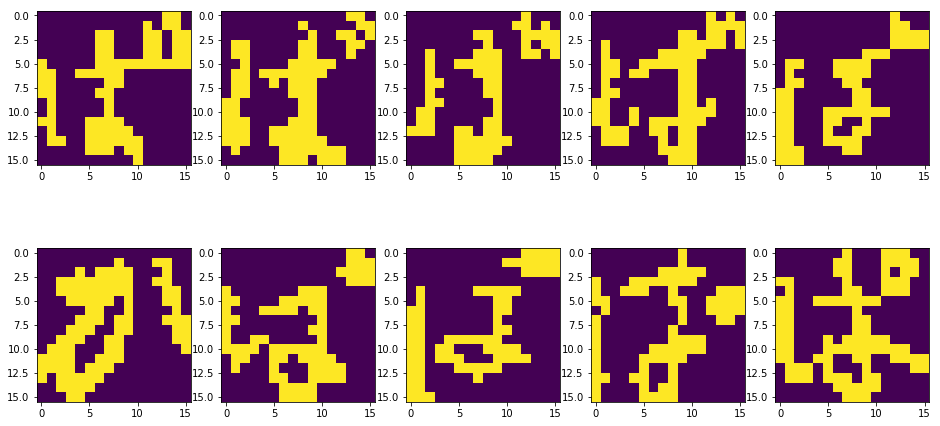

In [11]:
idx = np.array([28,29,30,32,36,48,63,67,71,77]) - 1
plt.figure(figsize=(16,8))
for i, ix in enumerate(idx):
    plt.subplot(2,5,i+1)
    plt.imshow(moji_test[ix].reshape(16,16))
plt.show()

また、以下に各文字の平均を表示する。

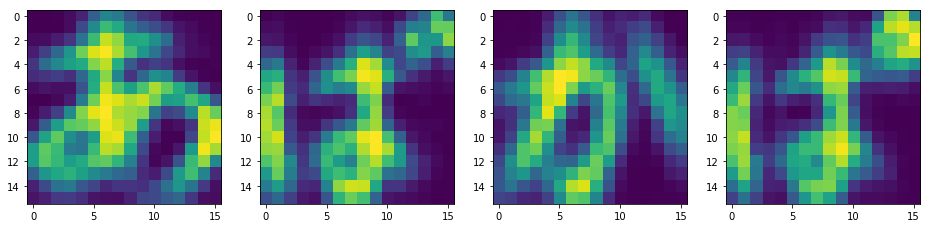

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(1,4,1)
plt.imshow(np.mean(moji_a, axis=0).reshape(16,16))
plt.subplot(1,4,2)
plt.imshow(np.mean(moji_ba, axis=0).reshape(16,16))
plt.subplot(1,4,3)
plt.imshow(np.mean(moji_ka, axis=0).reshape(16,16))
plt.subplot(1,4,4)
plt.imshow(np.mean(moji_pa, axis=0).reshape(16,16))
plt.show()

誤分類した文字について、これらは人間が見ても一見「ぱ」と「ば」のどちらであるか区別が難しいものもいくつか含まれているので、これらはデータ自体（テストデータと教師データの取り方）の影響によって発生した誤分類であると考えられる。なぜならば、使用した距離尺度はいずれも文字の形状を特徴量として扱うようなモデルではなく、単に与えられた文字Aと文字Bの画素がいくつ重なっているかという尺度でしかないし、「ば」と「ぱ」のそれぞれの平均を見ても、濁点と半濁点は形状というよりは単に濃度の違いしかないからである。位置ずれを補正するような仕組みもモデルに組み込まれていないため、濁点、半濁点が生じる距離の差よりも、人間が手書きすることによって生じた位置のズレや歪みによる誤差のほうが大きければ、このような誤分類は必然的に発生する。

重み付きユークリッド距離による判別評価基準は左下の「か」を正しく分類し（ユークリッド距離とコサイン類似度においてはいずれも「あ」であると認識した）、新たにひとつ「ぱ」を「か」であると誤分類したが、このふたつだけ見ても、どのような理由によってこの現象が起こったかは分からない。偶然発生した無意味なものかもしれないし、重み付けによって特徴的な画素の値が増幅された意味のあるものかもしれない（確かに「あ」と誤分類された「か」は「あ」の平均の値が大きい黄色の部分に大きく重なっている）。いずれにせよ高々80件のテストデータでひとつふたつ生じた違いを一般化して論じるべきではない。

# 2. 判別分析 (LDA)・主成分分析 (PCA)

レポート課題1では判別分析に対しては標本分散、主成分分析に対しては母分散の不偏推定量として分散を定義しており、今回も引き続きこの定義を踏襲します（理由はレポート課題1をご覧ください）。ただし今回は課題の設定上、未知のデータに対しても判別分析で求めた写像を適用する必要があるため、レポート課題1での解答とは異なり、テストデータは分けて写像を求めます。

## (a) 講義で説明された判別分析・主成分分析それぞれによる文字画像認識プログラムを作成・実行し、 その結果を認識正誤表にまとめ、認識率を求めよ。

## 判別分析

In [13]:
def lda(class1, class2, class3, class4):
    all = np.concatenate([class1, class2, class3, class4], axis=0)
    m = np.mean(all, axis=0)
    m1 = np.mean(class1, axis=0)
    m2 = np.mean(class2, axis=0)
    m3 = np.mean(class3, axis=0)
    m4 = np.mean(class4, axis=0)

    c1 = class1 - m1
    c2 = class2 - m2
    c3 = class3 - m3
    c4 = class4 - m4
    cm1 = m1[:,np.newaxis] - m[:,np.newaxis]
    cm2 = m2[:,np.newaxis] - m[:,np.newaxis]
    cm3 = m3[:,np.newaxis] - m[:,np.newaxis]
    cm4 = m4[:,np.newaxis] - m[:,np.newaxis]
    
    Cw = (c1.T.dot(c1) + c2.T.dot(c2) + c3.T.dot(c3) + c4.T.dot(c4)) / all.shape[0]
    
    Cb = (cm1.dot(cm1.T) + cm2.dot(cm2.T) + cm3.dot(cm3.T) + cm4.dot(cm4.T)) / all.shape[0]
    
    lam, V = la.eig(Cw, Cb)
    return (m, lam, V)

In [14]:
def plot_lda(data, label):
    plt.scatter(data[:,0][label==1], data[:,1][label==1], label='a')
    plt.scatter(data[:,0][label==2], data[:,1][label==2], label='ba')
    plt.scatter(data[:,0][label==3], data[:,1][label==3], label='ka')
    plt.scatter(data[:,0][label==4], data[:,1][label==4], label='pa')
    axis = plt.axis()
    _, _, ymin, ymax = axis
    plt.xlim(axis[:2])
    plt.ylim(axis[2:])
    plt.legend()
    plt.title('LDA')

In [15]:
# LDAを行う直交行列を取得し座標変換
m, _, X_lda = lda(moji_a, moji_ba, moji_ka, moji_pa)
moji_test_lda = moji_test.dot(X_lda)
moji_a_lda = moji_a.dot(X_lda)
moji_ba_lda = moji_ba.dot(X_lda)
moji_ka_lda = moji_ka.dot(X_lda)
moji_pa_lda = moji_pa.dot(X_lda)
print(moji_test_lda.shape)
print(moji_a_lda.shape)
print(moji_ba_lda.shape)
print(moji_ka_lda.shape)
print(moji_pa_lda.shape)

(80, 256)
(180, 256)
(180, 256)
(180, 256)
(180, 256)


In [16]:
# 識別率の測定
met_euclid_lda, result_euclid_lda = euclid(moji_a_lda, moji_ba_lda, moji_ka_lda, moji_pa_lda, moji_test_lda)
print_result(met_euclid_lda, result_euclid_lda, moji_test_lda, moji_test_label, print_all=True,
             output_path='result/moji_lda_euclid.txt')

NUM    MET1    MET2   MET3   MET4   RES   ANS  o/x
--------------------------------------------------
  1    5.23    5.90    5.49    5.97     1     1    o 
  2    7.12    7.46    7.35    7.57     1     1    o 
  3    5.91    6.50    6.21    6.57     1     1    o 
  4    5.38    5.97    5.66    6.02     1     1    o 
  5    5.92    6.37    6.06    6.43     1     1    o 
  6    6.19    6.85    6.38    6.91     1     1    o 
  7    5.66    6.22    5.99    6.28     1     1    o 
  8    5.36    5.96    5.72    6.02     1     1    o 
  9    5.86    6.36    6.12    6.44     1     1    o 
 10    5.41    5.97    5.65    6.05     1     1    o 
 11    6.57    7.19    6.77    7.20     1     1    o 
 12    6.65    7.24    6.87    7.27     1     1    o 
 13    5.94    6.38    6.10    6.43     1     1    o 
 14    5.66    6.09    5.91    6.17     1     1    o 
 15    6.17    6.60    6.31    6.68     1     1    o 
 16    6.78    7.35    6.96    7.41     1     1    o 
 17    5.73    6.35    6.00    6.4

92.5

## 主成分分析

In [17]:
def pca(class1, class2, class3, class4):
    X = np.concatenate([class1, class2, class3, class4], axis=0)
    m = np.mean(X, axis=0)
    C = np.cov(X.T)
    lam, V = la.eig(C)
    return (m, lam, V)

In [18]:
def plot_pca(data, label):
    plt.scatter(data[:,0][label==1], data[:,1][label==1], label='a')
    plt.scatter(data[:,0][label==2], data[:,1][label==2], label='ba')
    plt.scatter(data[:,0][label==3], data[:,1][label==3], label='ka')
    plt.scatter(data[:,0][label==4], data[:,1][label==4], label='pa')
    axis = plt.axis()
    _, _, ymin, ymax = axis
    plt.xlim(axis[:2])
    plt.ylim(axis[2:])
    plt.legend()
    plt.title('PCA')

In [19]:
m, _, X_pca = pca(moji_a, moji_ba, moji_ka, moji_pa)
moji_test_pca = (moji_test - m).dot(X_pca)
moji_a_pca = (moji_a - m).dot(X_pca)
moji_ba_pca = (moji_ba - m).dot(X_pca)
moji_ka_pca = (moji_ka - m).dot(X_pca)
moji_pa_pca = (moji_pa - m).dot(X_pca)
print(moji_test_pca.shape)
print(moji_a_pca.shape)
print(moji_ba_pca.shape)
print(moji_ka_pca.shape)
print(moji_pa_pca.shape)

(80, 256)
(180, 256)
(180, 256)
(180, 256)
(180, 256)


In [20]:
met_euclid_pca, result_euclid_pca = euclid(moji_a_pca, moji_ba_pca, moji_ka_pca, moji_pa_pca, moji_test_pca)
print_result(met_euclid_pca, result_euclid_pca, moji_test_pca, moji_test_label, print_all=True,
             output_path='result/moji_pca_euclid.txt')

NUM    MET1    MET2   MET3   MET4   RES   ANS  o/x
--------------------------------------------------
  1    5.23    9.50    7.99    9.77     1     1    o 
  2    7.48    8.89    8.40    9.16     1     1    o 
  3    6.31    9.01    7.91    9.23     1     1    o 
  4    5.54    9.09    8.08    9.33     1     1    o 
  5    6.16    9.09    7.53    9.37     1     1    o 
  6    6.28    9.24    8.12    9.42     1     1    o 
  7    5.93    9.25    8.24    9.51     1     1    o 
  8    5.60    9.16    8.31    9.39     1     1    o 
  9    5.48    9.08    7.67    9.41     1     1    o 
 10    5.25    9.06    7.89    9.35     1     1    o 
 11    6.83    9.71    8.31    9.89     1     1    o 
 12    6.65    9.53    7.67    9.71     1     1    o 
 13    5.91    8.92    7.40    9.15     1     1    o 
 14    6.17    8.30    7.53    8.58     1     1    o 
 15    6.17    8.83    8.10    8.94     1     1    o 
 16    7.02    9.41    7.88    9.66     1     1    o 
 17    5.98    9.51    8.14    9.7

88.75

主成分分析に用いる変換行列は直交行列であるため、データどうしのユークリッド距離は変化しないから、主成分分析をせずにユークリッド距離を用いて判別した場合と同じ結果になるこの結果は正しい（線形判別分析に用いる変換行列は一般に直交行列ではないので判別分析をせずにユークリッド距離を用いて判別した場合と異なる結果になるという結果は正しい）。

## (b) 判別分析において、写像後の学習データをプロットし、各軸の特性を考察せよ。 (※例えば、第1判別軸をX軸・第2判別軸をY軸のようにすればわかりやすい)

判別分析を適用したデータについて、横軸（第一軸）に1次元目、縦軸（第二軸）に2次元目をとって散布図を作成したのが以下の図である。

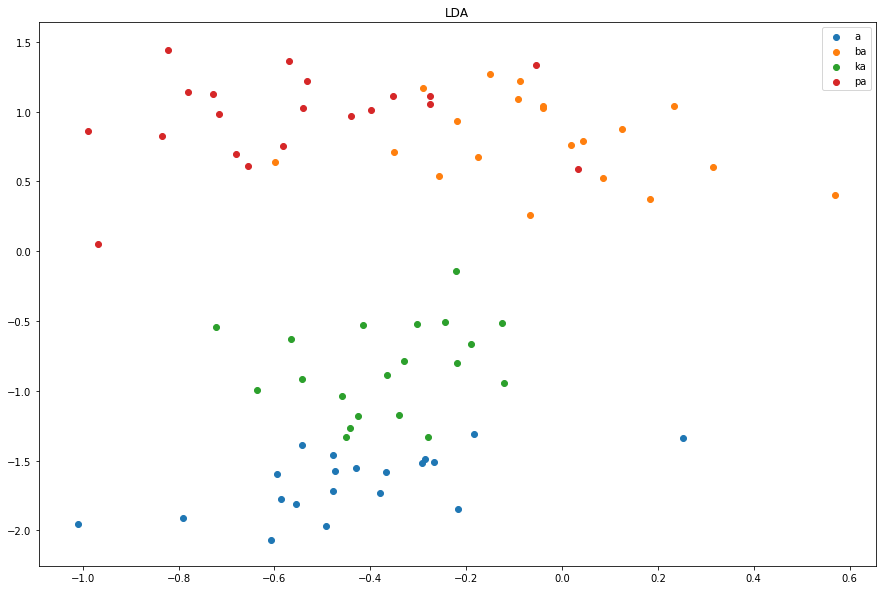

In [21]:
# プロット
plt.figure(figsize=(15,10))
plot_lda(moji_test_lda, moji_test_label)
plt.show()

第一軸は主に「ば」と「ぱ」を区別する方向の射影になっており、第二軸は（「あ」）、（「か」）、（「ば」「ぱ」のグループ）を区別する方向の射影になっていることがわかる。

同様に、主成分分析を適用したデータについて、横軸（第一軸）に1次元目、縦軸（第二軸）に2次元目をとって散布図を作成したのが以下の図である。

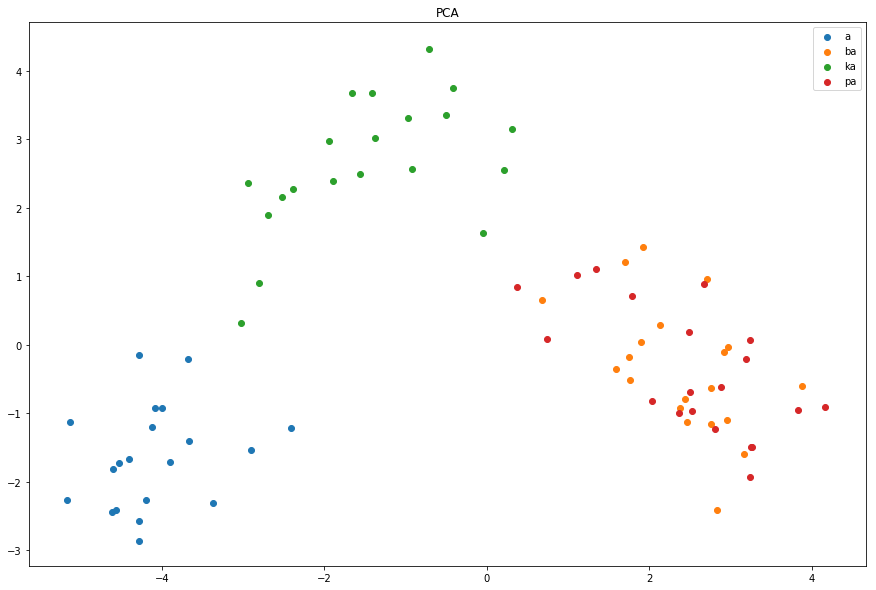

In [22]:
# プロット
plt.figure(figsize=(15,10))
plot_pca(moji_test_pca, moji_test_label)
plt.show()

主成分分析は分散が最大になる方向から順に分散が極大となる直交基底を選ぶ操作であるから、第一軸の分散のほうが第二軸の分散よりも大きくなっていることが見て取れる。主成分分析はそもそも各点のクラスを考慮するような仕組みになっていないから、（「あ」）、（「か」）、（「ば」と「ぱ」のグループ）がそれぞれ集まっているのはたまたまである（互いに似通った文字は互いのユークリッド距離が近いという、今回用いたデータ自体がもともと持っている特性である）。

## (c) 判別分析・主成分分析それぞれにおいて、認識に用いる軸の数を変化させ、認識率の変動をプロッ トし、考察せよ。

判別分析、主成分分析だけでなく、それらを適用する前の元の画像データにおいても認識に用いる軸の数を変化させて比較しなければならない。認識に用いる軸の数を増やすということは、元の画像においても線形変換後の画像においても、認識に用いる画素（正確には画素のパターン）を増やしていくことに等しい。したがって、元の画像においても軸の数を変化させていけば通常は認識率は徐々に増加（単調増加ではない）していくものであるが、これと比べても有用であることを示すべきである。また、重み付きユークリッド距離と主成分分析の関連についても触れたので、重み付きユークリッド距離を用いた場合についても比較しておく（重み付けたことで結果が改善するかどうかも興味深い検証の対象である）。

In [23]:
# 元画像の識別率の測定
recog_rate = []
for i in range(1, 256):
    met_euclid, result_euclid = euclid(moji_a[:,:i], moji_ba[:,:i],
                                               moji_ka[:,:i], moji_pa[:,:i], moji_test[:,:i])
    recog_rate.append(print_result(met_euclid, result_euclid, moji_test, moji_test_label,
                                       print_all=False, print_rate=False))
print(recog_rate)

[25.0, 26.25, 26.25, 26.25, 27.500000000000004, 33.75, 41.25, 42.5, 43.75, 46.25, 48.75, 48.75, 43.75, 58.75, 60.0, 58.75, 58.75, 58.75, 58.75, 58.75, 58.75, 65.0, 66.25, 65.0, 61.25000000000001, 60.0, 62.5, 63.74999999999999, 60.0, 57.49999999999999, 56.25, 58.75, 58.75, 58.75, 60.0, 58.75, 60.0, 62.5, 66.25, 68.75, 66.25, 71.25, 72.5, 71.25, 71.25, 72.5, 73.75, 72.5, 71.25, 71.25, 71.25, 70.0, 71.25, 72.5, 75.0, 76.25, 75.0, 73.75, 76.25, 76.25, 77.5, 77.5, 77.5, 75.0, 76.25, 75.0, 75.0, 73.75, 72.5, 73.75, 73.75, 75.0, 75.0, 75.0, 76.25, 75.0, 76.25, 73.75, 80.0, 83.75, 82.5, 82.5, 82.5, 82.5, 80.0, 81.25, 82.5, 82.5, 81.25, 83.75, 81.25, 82.5, 80.0, 82.5, 82.5, 82.5, 82.5, 82.5, 81.25, 82.5, 81.25, 83.75, 83.75, 83.75, 83.75, 83.75, 82.5, 85.0, 85.0, 83.75, 82.5, 81.25, 81.25, 81.25, 81.25, 82.5, 81.25, 83.75, 83.75, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.25, 87.5, 87.5, 87.5, 88.75, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 88.75, 88.75, 8

In [24]:
# 元画像の識別率の測定（重み付きユークリッド距離）
recog_rate_weighted = []
for i in range(1, 256):
    met_weighted_euclid, result_weighted_euclid = weighted_euclid(w[:i], moji_a[:,:i], moji_ba[:,:i],
                                                                moji_ka[:,:i], moji_pa[:,:i], moji_test[:,:i])
    recog_rate_weighted.append(print_result(met_weighted_euclid, result_weighted_euclid, moji_test, moji_test_label,
                                            print_all=False, print_rate=False))
print(recog_rate_weighted)

[25.0, 26.25, 26.25, 26.25, 27.500000000000004, 33.75, 41.25, 42.5, 42.5, 41.25, 45.0, 46.25, 41.25, 53.75, 56.25, 56.25, 53.75, 55.00000000000001, 55.00000000000001, 55.00000000000001, 61.25000000000001, 62.5, 65.0, 66.25, 62.5, 61.25000000000001, 58.75, 60.0, 60.0, 57.49999999999999, 60.0, 56.25, 56.25, 58.75, 58.75, 57.49999999999999, 56.25, 62.5, 66.25, 65.0, 66.25, 66.25, 72.5, 72.5, 73.75, 73.75, 75.0, 76.25, 75.0, 75.0, 77.5, 72.5, 72.5, 75.0, 73.75, 71.25, 76.25, 78.75, 78.75, 78.75, 80.0, 78.75, 78.75, 80.0, 80.0, 78.75, 77.5, 78.75, 77.5, 76.25, 76.25, 76.25, 76.25, 76.25, 76.25, 76.25, 75.0, 71.25, 77.5, 78.75, 80.0, 82.5, 81.25, 80.0, 78.75, 80.0, 80.0, 81.25, 80.0, 81.25, 81.25, 81.25, 82.5, 82.5, 82.5, 85.0, 82.5, 82.5, 85.0, 87.5, 83.75, 85.0, 86.25, 85.0, 85.0, 85.0, 87.5, 88.75, 88.75, 88.75, 85.0, 85.0, 83.75, 82.5, 85.0, 83.75, 85.0, 86.25, 85.0, 86.25, 86.25, 86.25, 86.25, 85.0, 85.0, 85.0, 83.75, 83.75, 86.25, 83.75, 83.75, 85.0, 85.0, 85.0, 86.25, 86.25, 87.5, 87.

In [25]:
# 判別分析後の識別率の測定
recog_rate_lda = []
for i in range(1, 256):
    met_euclid_lda, result_euclid_lda = euclid(moji_a_lda[:,:i], moji_ba_lda[:,:i],
                                               moji_ka_lda[:,:i], moji_pa_lda[:,:i], moji_test_lda[:,:i])
    recog_rate_lda.append(print_result(met_euclid_lda, result_euclid_lda, moji_test_lda, moji_test_label,
                                       print_all=False, print_rate=False))
print(recog_rate_lda)

[47.5, 87.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.5, 92.

In [26]:
# 主成分分析後の識別率の測定
recog_rate_pca = []
for i in range(1, 256):
    met_euclid_pca, result_euclid_pca = euclid(moji_a_pca[:,:i], moji_ba_pca[:,:i],
                                               moji_ka_pca[:,:i], moji_pa_pca[:,:i], moji_test_pca[:,:i])
    recog_rate_pca.append(print_result(met_euclid_pca, result_euclid_pca, moji_test_pca, moji_test_label,
                                   print_all=False, print_rate=False))
print(recog_rate_pca)

[73.75, 77.5, 78.75, 78.75, 80.0, 81.25, 78.75, 77.5, 81.25, 82.5, 85.0, 82.5, 80.0, 80.0, 80.0, 81.25, 81.25, 82.5, 85.0, 83.75, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 87.5, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88.

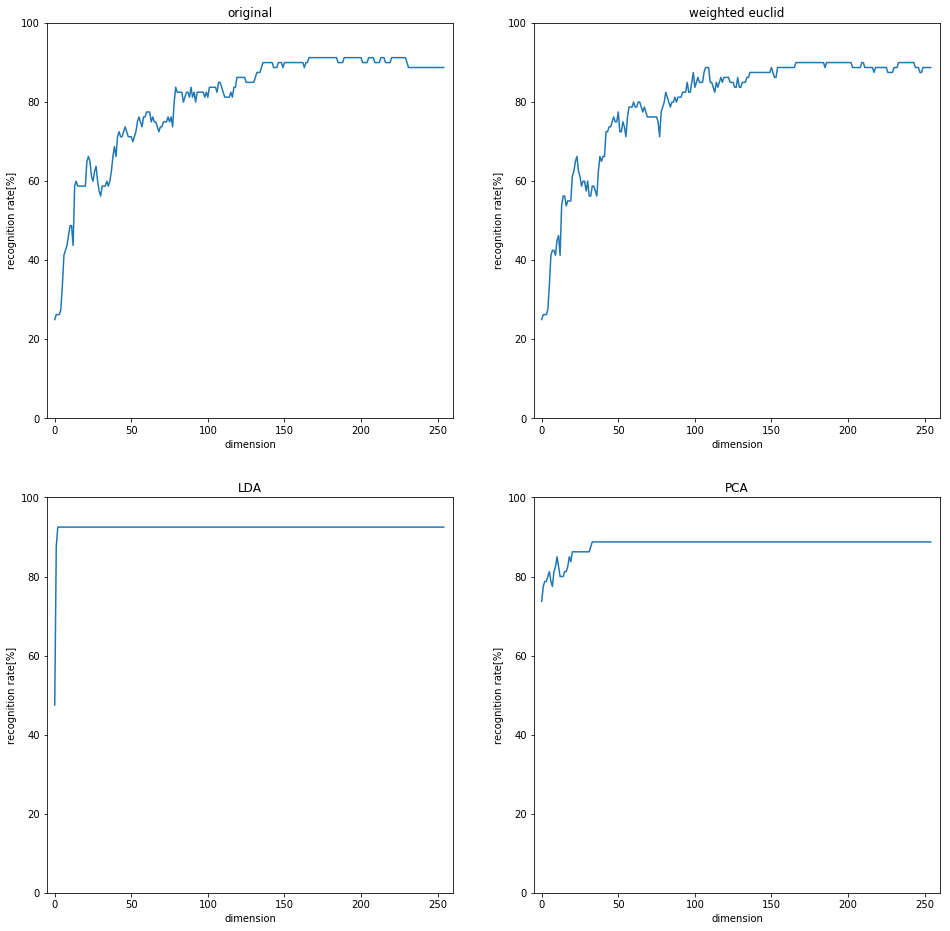

In [27]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(recog_rate)
plt.title('original')
plt.xlim([-5,260])
plt.ylim([0,100])
plt.xlabel('dimension')
plt.ylabel('recognition rate[%]')
plt.subplot(2,2,2)
plt.plot(recog_rate_weighted)
plt.title('weighted euclid')
plt.xlim([-5,260])
plt.ylim([0,100])
plt.xlabel('dimension')
plt.ylabel('recognition rate[%]')
plt.subplot(2,2,3)
plt.plot(recog_rate_lda)
plt.title('LDA')
plt.xlim([-5,260])
plt.ylim([0,100])
plt.xlabel('dimension')
plt.ylabel('recognition rate[%]')
plt.subplot(2,2,4)
plt.plot(recog_rate_pca)
plt.title('PCA')
plt.xlim([-5,260])
plt.ylim([0,100])
plt.xlabel('dimension')
plt.ylabel('recognition rate[%]')
plt.show()

### ユークリッド距離・重み付きユークリッド距離
元画像で左上から順に軸（画素数）を増やした場合、ユークリッド距離も重み付きユークリッド距離も定性的・定量的にあまり違いはなく、画素数の増加にしたがって認識率は改善していく（単調増加ではない）。文字は画像の中心近くに多くの情報が含まれるため、次元は160〜230のあたりで最大となる。それ以上次元を大きくすると結果は逆に悪化しているが、画像右下の部分は識別にはなんら寄与しせずむしろノイズとなっていることを示唆している（もっとも、これは左上から順に操作したことにも起因しているので、その他の画素が同様に識別に寄与しない可能性もある。どの画素が識別に寄与しているかは線形判別分析の基底を見れば分かる）。定量的には、今回は重み付きユークリッド距離のほうが認識率の最大値が1.25%小さい。これは今回用いた重みでの重み付きユークリッド距離が有用な評価基準にはならなかったことを示しており、その原因は共分散を考慮しない正規化を行なったためであると考えられる。

### 判別分析
判別分析によって得られた基底を用いると、第三軸まででほぼ最大値に到達しており、その他の軸は判別を行う上で結果にほとんど寄与していないことがわかる。もとが256次元であったことを考えるとデータ量を約1.2%まで圧縮した優秀な次元削減となっている。第三軸までの基底を画像として表示すると以下のようになる。

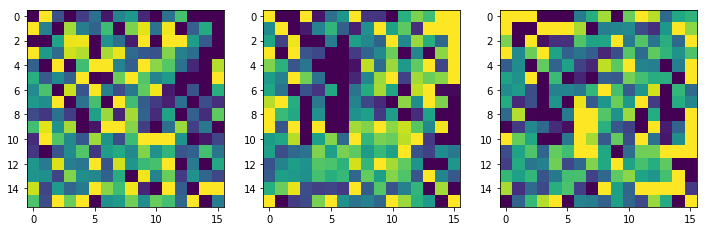

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(X_lda[:,0].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(1,3,2)
plt.imshow(X_lda[:,1].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(1,3,3)
plt.imshow(X_lda[:,2].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.show()

人間にとっては解釈が難しい基底となっている。

### 主成分分析
主成分分析では第一軸から第34軸までで認識率がおおよそ最大値に達している。直交変換なのでユークリッド距離を用いた判別基準においては識別率は変わらないが、もとが256次元であったことを考えると、約13%にまで圧縮されており、教師なしの次元削減としての機能は果たしている。第34軸まですべてを表示すると冗長なので、第九軸までを表示しておおよその傾向は掴むことにする。

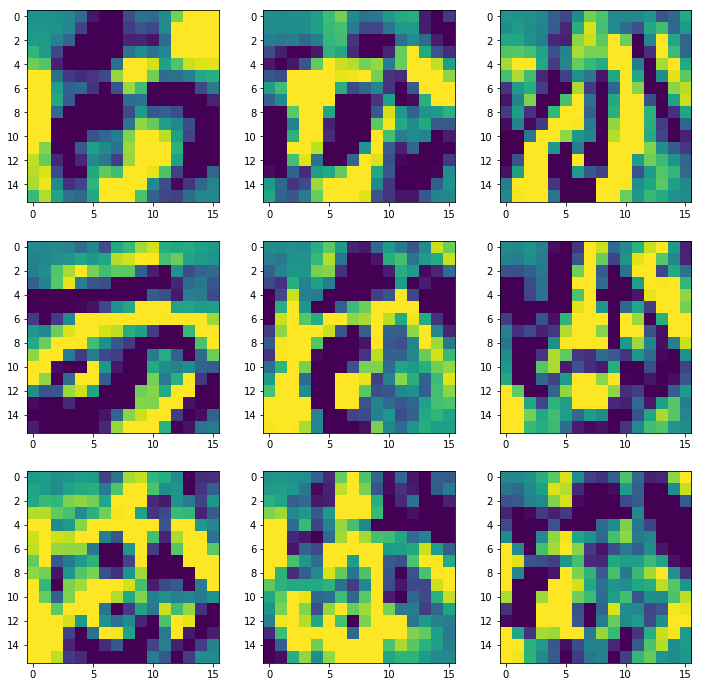

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.imshow(X_pca[:,0].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,2)
plt.imshow(X_pca[:,1].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,3)
plt.imshow(X_pca[:,2].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,4)
plt.imshow(X_pca[:,3].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,5)
plt.imshow(X_pca[:,4].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,6)
plt.imshow(X_pca[:,5].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,7)
plt.imshow(X_pca[:,6].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,8)
plt.imshow(X_pca[:,7].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.subplot(3,3,9)
plt.imshow(X_pca[:,8].reshape(16,16), vmin=-0.05, vmax=0.05)
plt.show()

主成分分析は元データの分散を最大にする方向ベクトルを取得するから、定性的には「すべての信号にもっとも頻繁に強く含まれる信号成分」のようなものを抽出している。すなわち「あ」「ば」「か」「ぱ」のすべての手書き教師データを集めたとき、もっとも多く重なっている画素を抽出するような基底を選んでくる。実際に一番左上の第一主成分を見ると、「あ」「ば」「か」「ぱ」のいずれにも重なりそうな部分が大きい値を取っている（黄色に着色されている）。

## (d) [発展課題] 文字画像データの特徴を考え、前回の 2 次元データとの違いを考察せよ。
人間がデータを扱う上で大きな問題となるのはその次元である。人間は普通は3次元までしか空間的に把握することができないため、文字画像データのように大きな次元を持つデータを扱う場合、それをユークリッド空間上にプロットして空間上での分布を眺めることはできない（あるいは今回用いた判別分析・主成分分析などによる次元圧縮を用いて工夫して可視化せねばならない）。そのためデータの高次元の構造を直感的に把握することができず、モデル構築には実際にデータをプロットしてみる以外のアプローチが必要となる。

文字画像データと、ほぼガウス分布にしたがってランダムに生成された（かどうかは記述がなかったため不明だが、そのように見受けられた）ような前回の２次元データはもともと各確率変数間の相関は小さいが、今回用いたような文字画像データでは、任意の点はそれに隣接した点と強い相関を持つ。そのため、単に重み付きユークリッド距離を取るような操作は各確率変数に対して数学的に妥当性のないでたらめな操作（相関を無視して事前分布をいじるような操作）を行うことに等しい。主成分分析をして各確率変数間の相関を0にしてから重み付きユークリッド距離を取るのであれば、これは白色化に近い操作であって、まだ妥当な操作になる（ZCA Whiteningなど）。

また、文字データの特徴は、単なる２次元データにはない「形状」の情報を持っているということである。ユークリッド距離やコサイン類似度などは単に画素の重なり具合を見ているだけであって、形状の差異は距離尺度に反映されない（たとえば今回であれば、濁点と半濁点は本来なら「二本の線分」と「丸」という形状的には大きく異なるものであるが、形状の差異に着目するような目的関数は設定されていないためしばしば誤分類の原因となっている）。形状を抽出するには普通はフィルタ処理やCNNを用いる。

# 3. パターン認識論について

## (a) 今までのすべての結果から各手法の長所短所を示し、それについて考察せよ。
## 判別評価基準
### Nearest Neighbor
* 長所: 複雑な決定境界を持つことができる。
* 短所: 分布が混ざるような部分での認識率が悪化する。

### ユークリッド距離
* 長所: ベクトルのノルムと方向を合わせたような距離尺度になっている（方向よりはむしろノルムの影響を強く受ける）。
* 短所: ベクトルのノルムよりも方向が重要な場合にうまく機能しない。

### コサイン類似度
* 長所: データの相関を取ることとほぼ同義なので、ベクトルのノルムによらず、同じ方向を向いているものを近いものとみなすことができる。
* 短所: ベクトルの方向よりもノルムが重要な場合にうまく機能しない。

### 重み付きユークリッド距離
* 長所: おそらくない（観測する単位を変えることと大差がないし、マハラノビス距離ならともかくとして使っているのを見たことがない）。
* 短所: あまり使う意味がない。

## 判別分析
* 長所: 教師データにラベルが付与されているとき、その情報を反映して（主成分分析に比べて）識別に有利な写像を学習できる。
* 短所: クラス間分散の分散共分散行列が正定値対称行列にならない場合に解くのが困難。データ数が少ないとき未知データの外挿に対して妥当性が保証されにくい。

## 主成分分析
* 長所: 教師データにラベルが付与されていなくても使用できる。
* 短所: 分散が最大の方向が識別に有利な写像を与えるとは限らない。


## (b) 現在はまだ実用化されていないが、今後新しくパターン認識技術を用いて何ができるか自分で考え、説明せよ。
「パターン認識技術」の定義および適用領域が不明確であり回答できない。

## (c) [授業評価] 本講義の難易度ついて、またレポート課題について感じたことを述べよ。また、理解に苦しんだ項目があればそれについても述べよ。
理解に苦しんだ項目：上の設問(b)

「パターン認識技術」を回答可能な具体性を持って定義するか、あるいはいくつかの具体例を列挙することでもって、修正するようお願いいたします。何をもって「パターン」と呼ぶのか（たとえば課題で扱ったような「基底」をパターンと呼んでいるのかどうか）、データの背後にはパターンが存在するのか（確率的なデータにはパターンは仮定されません）、存在するとしてそれを取り出すことができるのか、といったことは自明ではなく、問題とデータが与えられてからモデルとアルゴリズムを考えるものです。特に「実用化されていないが、新しく」というデータの背後にパターンが存在するかどうかは、検証してみないとわかりません。なぜならば実用化されていないからです。「理論的にはパターンが存在することになっているが、計算機やセンサの能力、倫理的な問題などによって未だ実用化には至っていない」ということをおっしゃっているのですか？